In [3]:
import pandas as pd
#Import os to ensure the files are in the existing directory.
import os 
os.chdir('..')

prices = pd.read_csv('Desktop/sample_prices.csv')
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [5]:
#Natutally,as it is a change, the chnage for the first element would be N.A. In order to drop that from the dataframe, you can opt for the dropna
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


Note that in the below section, the return.std() is not equal to the intuitive method of computing standard deviation. This is because SD would give us the sample volatility,as the denominator of the formula includes n-1.
However, for the population standard deviation, the denominator is merely n.

In [8]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [9]:
#To measure the spread(how far the returns are from the mean):
deviation = returns - returns.mean()
sq_deviation = deviation**2
#Now you have to divide it by no of data point (n, not n-1)
variance = sq_deviation.mean()
volatility = variance**0.5
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [10]:
#To measure the spread(how far the returns are from the mean):
deviation = returns - returns.mean()

sq_deviation = deviation**2
variance = sq_deviation.mean()
#This is an alternative method to do this. sqrt is square root function
import numpy as np
volitality = np.sqrt(variance)
volitality

BLUE      0.022957
ORANGE    0.076212
dtype: float64

The above codes have only allowed us to compute the population standard deviation, but not the sample deviaition. Thus, the below code would help us to find the sample standard deviation.

In [11]:
#You cna use shape to figure out the number of rows and columns in each matrix.
#Shape you give the rows or columns in the form of a tuple. A audited data structure that you cannot change or alter. This is fixed sequence of numbers.
returns.shape

(12, 2)

In [12]:
#As you would like to extract the first elememt(columns), you would add 0.
number_of_obs = returns.shape[0]
variance = sq_deviation.sum()/(number_of_obs-1)
volitality = variance**0.5

In [13]:
volitality

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [14]:
#The above code is a longer way to compute volitality. You can simply:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [15]:
#However, this volitaility is monthly one. In order to compute the annual volitality, you need to:
#Note that numpy would allow you to take the square root.
returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [16]:
#Header is in row 0
returns = pd.read_csv("desktop/Portfolios_Formed_on_ME_monthly_EW.csv",
                      header= 0, index_col=0, parse_dates = True, na_values = -99.99
                     )
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [17]:
#Since there is a lot of data, we would make a list of columns that we are interested in.
columns= ['Lo 10','Hi 10']
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [18]:
#To covert the percentage to the raw numbers
returns= returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [19]:
#In order to chnage lo10 and high10, you can do the following:
returns.columns = ["Small Cap","Large Cap"]
returns

,Small Cap,Large Cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270
...,...,...
201808,0.0241,0.0234
201809,-0.0168,0.0087
201810,-0.1002,-0.0657
201811,-0.0365,0.0253


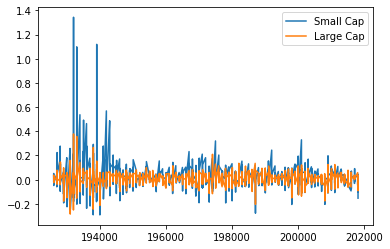

In [20]:
returns.plot.line()

In [21]:
returns.std()

Small Cap    0.106288
Large Cap    0.053900
dtype: float64

In [22]:
#These are monthly returns,and we would like to find annualized returns.
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

Small Cap    0.368193
Large Cap    0.186716
dtype: float64

We would like to compute the returns too.But as the file size is large, we do not know how many months of returns we have. We can do so easily by:

In [23]:
#Just call returns, and the rows are given underneath this.
returns

,Small Cap,Large Cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270
...,...,...
201808,0.0241,0.0234
201809,-0.0168,0.0087
201810,-0.1002,-0.0657
201811,-0.0365,0.0253


In [24]:
#To count the number of rows
n_months = returns.shape[0]
#Doing the inverse of annualization of the return.
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

Small Cap    0.012986
Large Cap    0.007423
dtype: float64